# Analysis of the Impact of Covid-19 Pandemic on the Global Economy

This project aims to conduct an in-depth analysis of the "Impact of Covid-19 Pandemic on the Global Economy" dataset. We aim to uncover novel insights about the pandemic's economic effects, focusing on specific industries, regional disparities, social inequality, the long-term implications of remote work, the impact on mental health and productivity, and the effectiveness of post-pandemic recovery strategies.

We're specificly attempting to analyse the Stringency and Economic Impact: How does the stringency of lockdown measures correlate with the economic impact across different countries, adjusted for GDP per capita and human development index.

### Importing libraires

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Stage 1: Data Acquisition

In [3]:
data_dir = 'C:/Users/uadusum1/Documents/GitHub/Covid-19-Impact-Analysis'
os.chdir(data_dir)
filename = "data.csv"
data = pd.read_csv(filename)

## Stage 2: Data Preprocessing

Let's check for missing values

In [4]:
print(data.isnull().sum())

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                 50418
Unnamed: 10                50418
Unnamed: 11                50418
Unnamed: 12                50418
Unnamed: 13                50418
dtype: int64


Now, let's take a look at the Data Types

In [5]:
print(data.dtypes)


iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
Unnamed: 9                 float64
Unnamed: 10                float64
Unnamed: 11                float64
Unnamed: 12                float64
Unnamed: 13                float64
dtype: object


For the columns with some missing values, we fill in with mean (for numerical data)

In [6]:
data['total_cases'].fillna(data['total_cases'].mean(), inplace=True)
data['total_deaths'].fillna(data['total_deaths'].mean(), inplace=True)
data['stringency_index'].fillna(data['stringency_index'].mean(), inplace=True)
data['gdp_per_capita'].fillna(data['gdp_per_capita'].mean(), inplace=True)
data['human_development_index'].fillna(data['human_development_index'].mean(), inplace=True)


Columns Unnamed: 9 through Unnamed: 13 seem to have a lot of missing data (or possibly are empty). It would be best to drop them.

In [7]:
data = data.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])

In [8]:
print(data.isnull().sum())

iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
dtype: int64


The date column is currently of the object datatype. To facilitate time series analysis, let's convert this to a datetime datatype.

In [9]:
data['date'] = pd.to_datetime(data['date'])

Now, let's check for duplicate rows and remove them.

In [10]:
print(data.duplicated().sum())

0


In [11]:
data.drop_duplicates(inplace=True)

## Stage 3: Exploratory Data Analysis (EDA)

Basic statistical details:

In [12]:
print(data.describe())

        total_cases   total_deaths  stringency_index    population  \
count  5.041800e+04   50418.000000      50418.000000  5.041800e+04   
mean   6.621927e+04    2978.767819         56.162022  4.251601e+07   
std    3.919481e+05   12204.916580         25.512844  1.564607e+08   
min    0.000000e+00       0.000000          0.000000  8.090000e+02   
25%    1.480000e+02      18.000000         41.670000  1.399491e+06   
50%    2.057500e+03     200.000000         56.162022  8.278737e+06   
75%    2.871075e+04    2978.767819         76.390000  2.913681e+07   
max    8.154595e+06  219674.000000        100.000000  1.439324e+09   

       gdp_per_capita  human_development_index  
count    50418.000000             50418.000000  
mean     20818.706240                 0.720139  
std      19248.613445                 0.150680  
min        661.240000                 0.000000  
25%       6253.104000                 0.640000  
50%      16409.288000                 0.723000  
75%      27936.896000     

Let's try to understand the distribution of certain numerical columns:

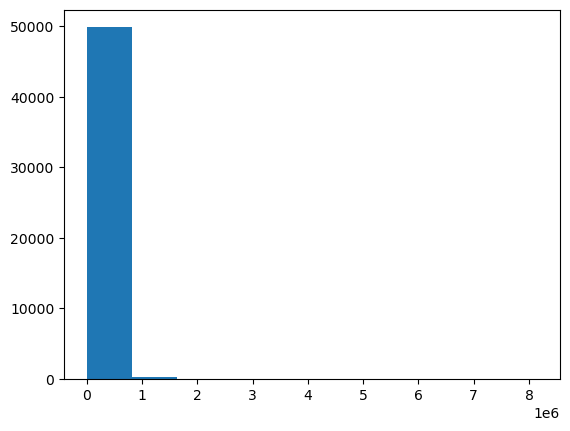

In [13]:
plt.hist(data['total_cases'])
plt.savefig('v-histogram dist of total_cases.png', dpi=700,bbox_inches='tight')
plt.show()

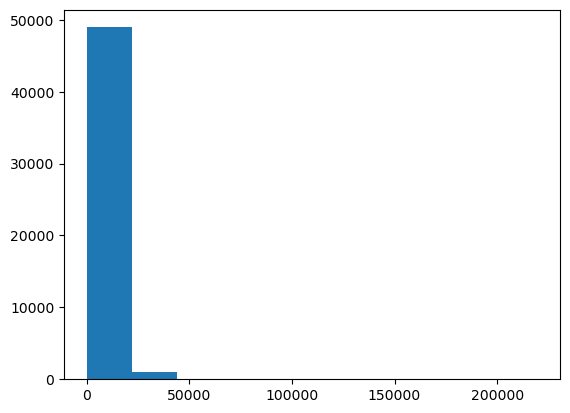

In [14]:
plt.hist(data['total_deaths'])
plt.savefig('v-histogram dist of total_deaths.png', dpi=700,bbox_inches='tight')
plt.show()

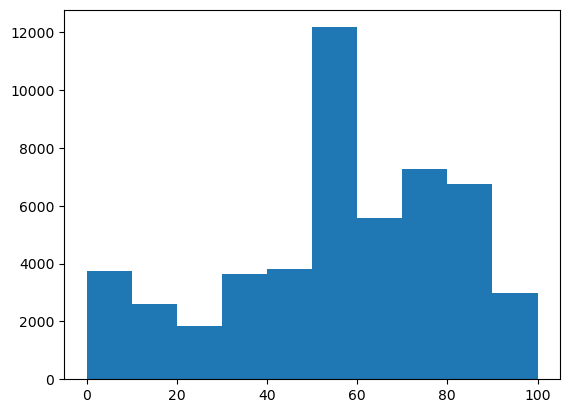

In [15]:
plt.hist(data['stringency_index'])
plt.savefig('v-histogram dist of stringency_index.png', dpi=700,bbox_inches='tight')
plt.show()

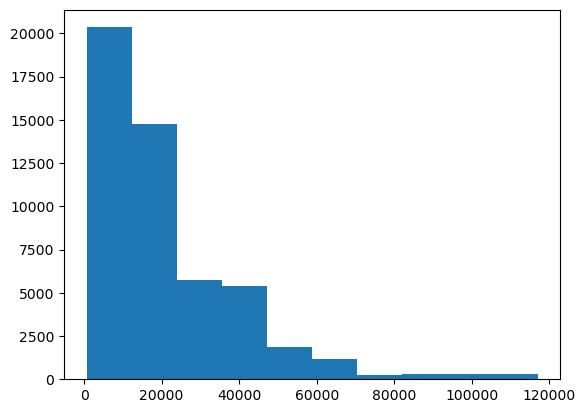

In [16]:
plt.hist(data['gdp_per_capita'])
plt.savefig('v-histogram dist of gdp_per_capita.png', dpi=700,bbox_inches='tight')
plt.show()

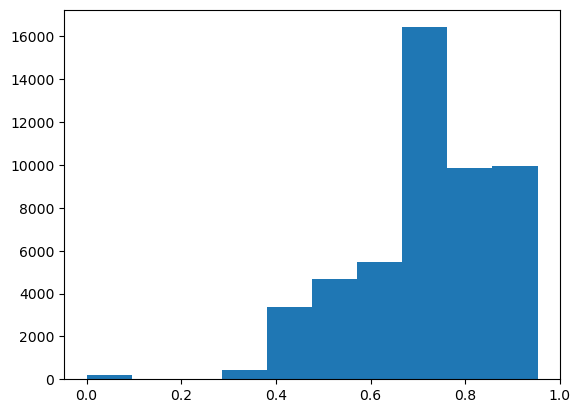

In [17]:
plt.hist(data['human_development_index'])
plt.savefig('v-histogram dist of human_development_index.png', dpi=700,bbox_inches='tight')
plt.show()

To see the correlation matrix:

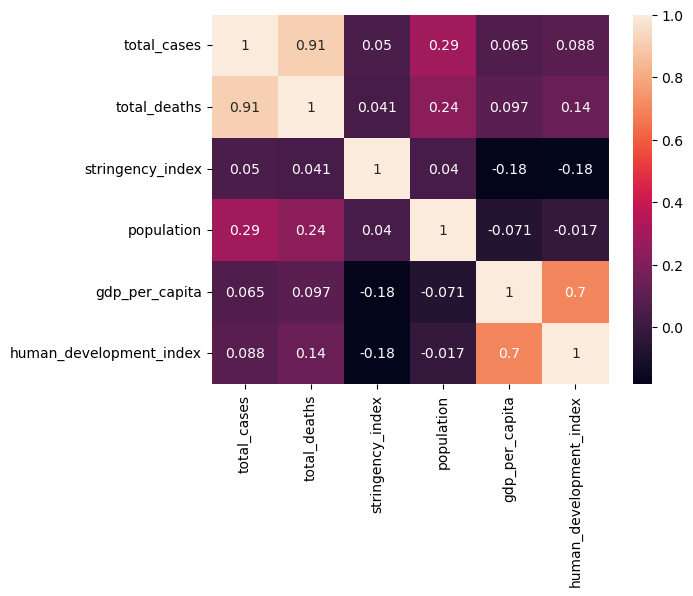

In [18]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.savefig('v-correlation matrix.png', dpi=700,bbox_inches='tight')
plt.show()

Pairplot for visualizing the Pairwise Repationships:

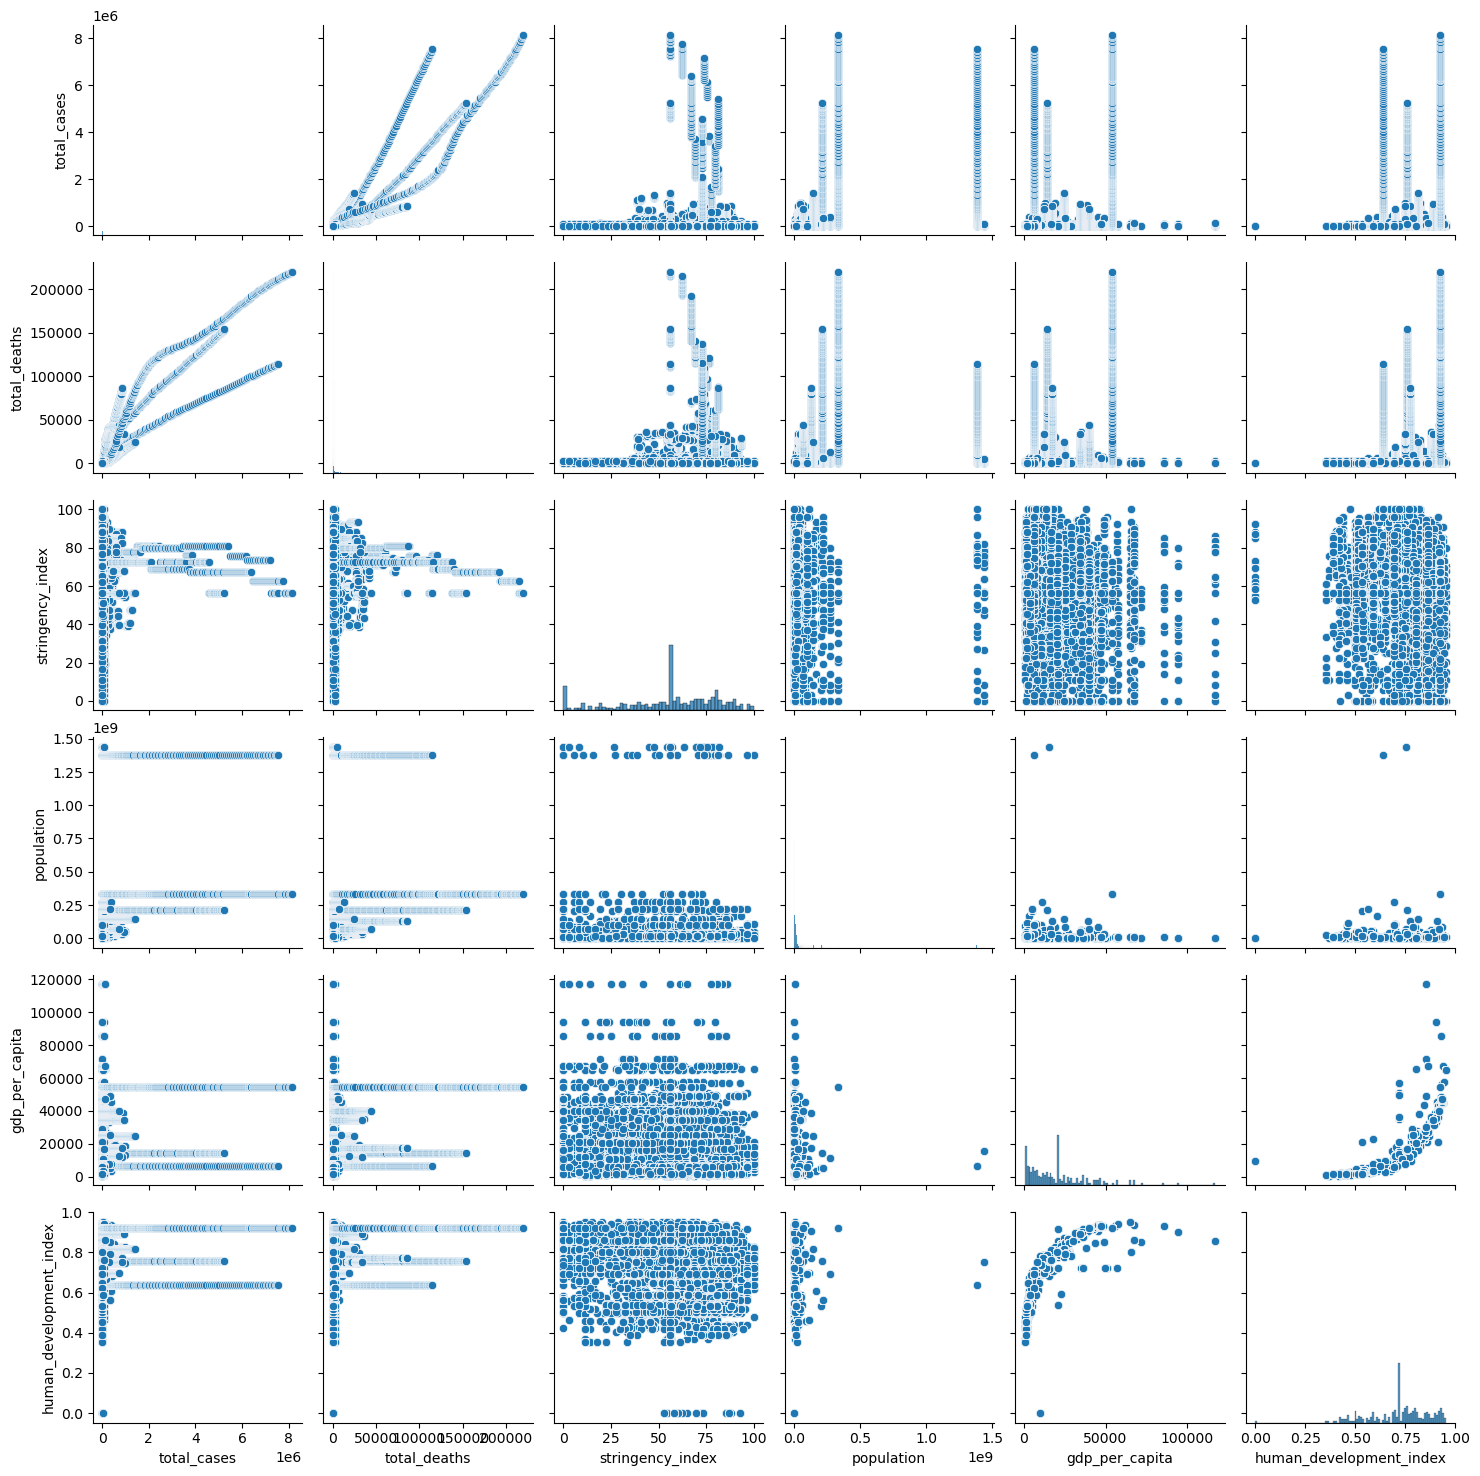

In [19]:
sns.pairplot(data)
plt.savefig('v-pairwise relationships.png', dpi=700,bbox_inches='tight')
plt.show()

Correlation matrix with respect to Stringency and Economic Impact:

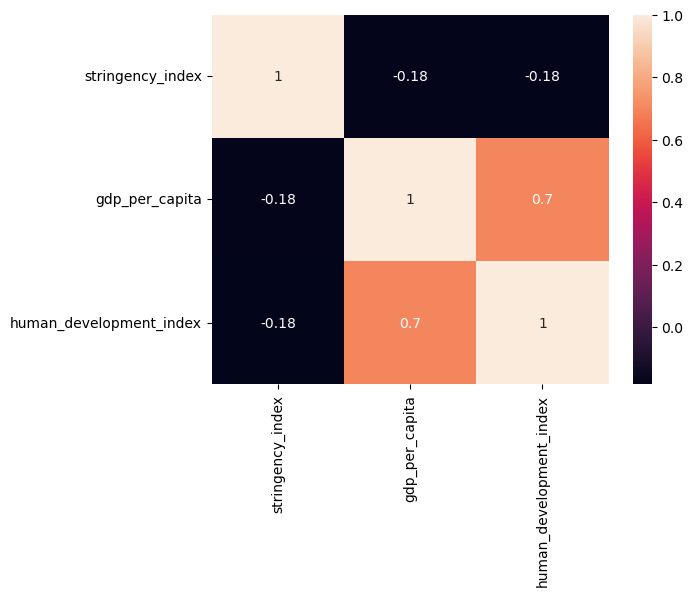

In [20]:
corr = data[['stringency_index', 'gdp_per_capita', 'human_development_index']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.savefig('v-correlation heatmap, SEI.png', dpi=700,bbox_inches='tight')
plt.show()

The heatmap will give you a visual representation of the correlation between stringency measures and the two indicators of economic impact, gdp_per_capita and human_development_index. You can infer from this the relationship between the strictness of COVID-19 measures and economic factors.

Remember that correlation does not imply causation. While this analysis can give you a sense of the relationship between these variables, it can't tell you whether changes in one variable cause changes in another. For that, we would need a more complex causal analysis.

Also note that the stringency index is not a direct measure of economic impact. It is a measure of how strict a country's policies are in response to COVID-19. The economic impact of COVID-19 would ideally be measured using direct economic indicators, such as changes in GDP, unemployment rates, etc., which are not available in this dataset.

## Stage 4: Feature Engineering and Selection

For this stage, since we are exploring the relationship between 'stringency_index', 'gdp_per_capita', and 'human_development_index', these will be our main features. Random Forest is a powerful model that can capture non-linear relationships and interactions between features. It doesn't require explicit feature engineering for non-linearities because it can handle them implicitly through the structure of the decision trees.

## Stage 5: Model Selection and Training

### Regression Analysis

Let's first analyze correlation by conducting a regression analysis to measure the relationship between our features.

As the first step in this stage, let's Define our features and target:

In [21]:
features = ['gdp_per_capita', 'human_development_index']
target = 'stringency_index'

Here we're adding a constant to the features, as it's a requirement for the statsmodels library:

In [22]:
X = sm.add_constant(data[features])
y = data[target]

Here we fit an Ordinary Least Squares (OLS) regression model to our data. OLS regression is a common method for estimating the unknown parameters in a linear regression model. It minimizes the sum of the squared residuals, hence "least squares".

After that, we print out the summary of our model, which includes a lot of information, but the key thing to look at is the 'coef' column. This will give you the coefficients of your regression equation for 'gdp_per_capita' and 'human_development_index'. Positive values indicate a positive relationship with the 'stringency_index', while negative values indicate an inverse relationship.

In [23]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       stringency_index   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1002.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        17:46:49   Log-Likelihood:            -2.3387e+05
No. Observations:               50418   AIC:                         4.677e+05
Df Residuals:                   50415   BIC:                         4.678e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Random Forrest

Handle missing values by imputing the median:

In [24]:
for col in ['stringency_index', 'gdp_per_capita', 'human_development_index']:
    data[col] = data[col].fillna(data[col].median())

Split the data into train and test sets:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

Initialize the model:

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

Train the model:

In [27]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make predictions on the test set:

In [28]:
y_pred = model.predict(X_test)

Calculate the root mean squared error of the model:

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 21.068944696280607


## Stage 6: Model Evaluation

We have already computed the root mean squared error (RMSE) for the Random Forest model, which is 21.069. As for the OLS regression model, the R-squared value stands at 0.038. This indicates that only 3.8% of the variation in the stringency index can be explained by GDP per capita and Human Development Index. This is quite low, suggesting that these variables alone don't strongly predict the stringency index.

## Stage 7: Interpretation and Insights Extraction

The Random Forest model has an RMSE of around 21.07. This means, on average, the model's predictions are approximately 21.07 units away from the actual values.

In the OLS Regression model, both the GDP per capita and Human Development Index variables are statistically significant in predicting the stringency index, as indicated by the P-values which are less than 0.05. However, their coefficients are quite small, suggesting that for each unit increase in these variables, the stringency index only changes by a small amount.

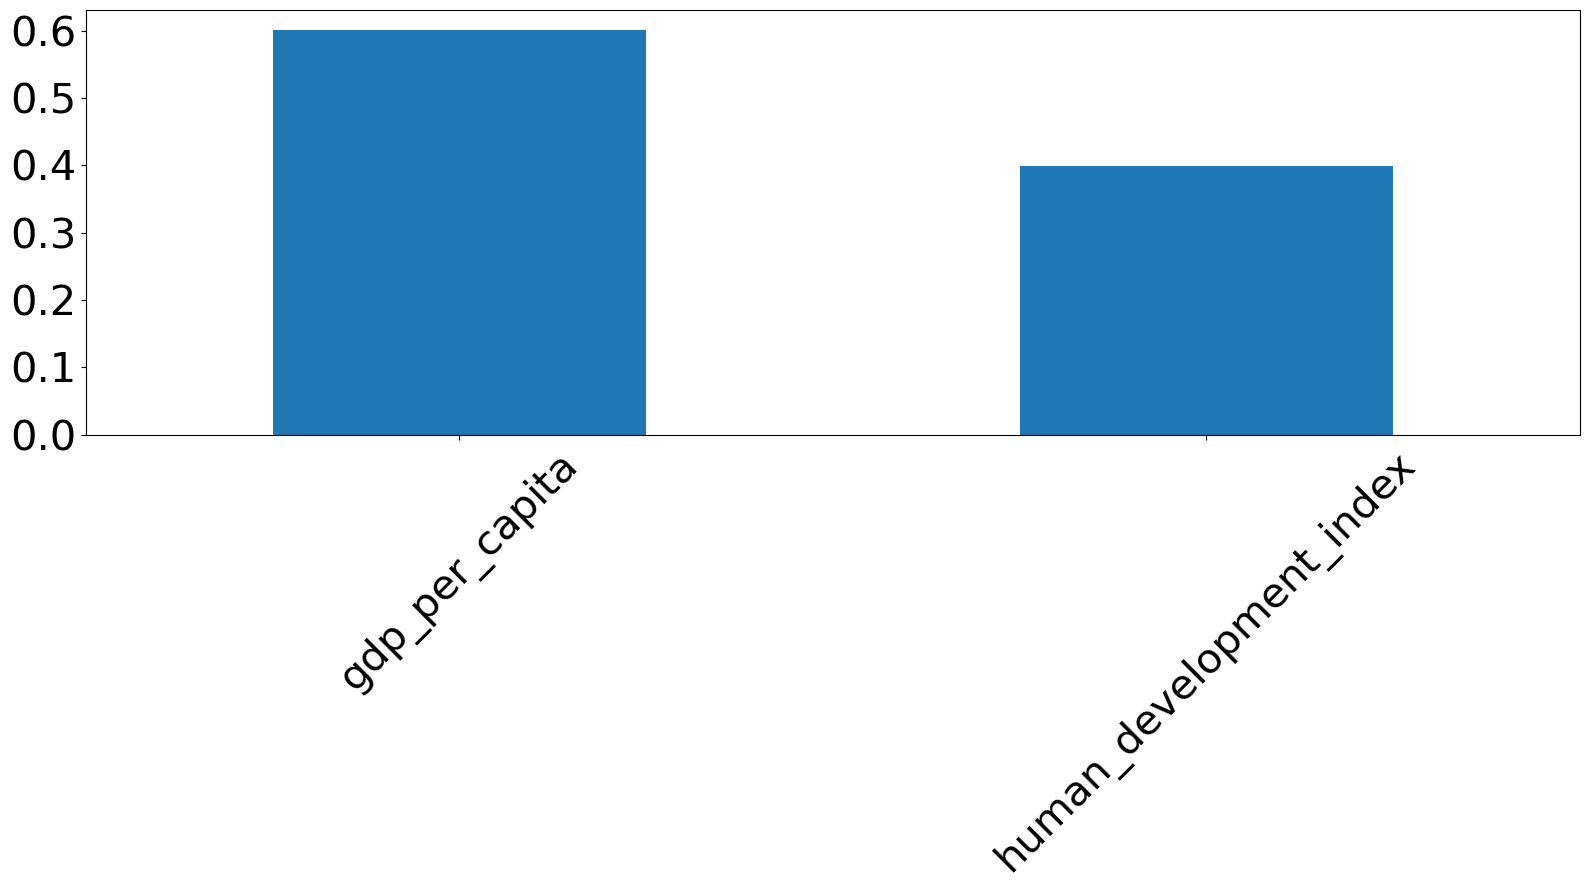

In [30]:
# Get feature importances and Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels:
importances = model.feature_importances_
f_importances = pd.Series(importances, data[features].columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Bar plot interpreting results:
plt.tight_layout()
plt.savefig('v-Interpretation.png', dpi=700,bbox_inches='tight')
plt.show()

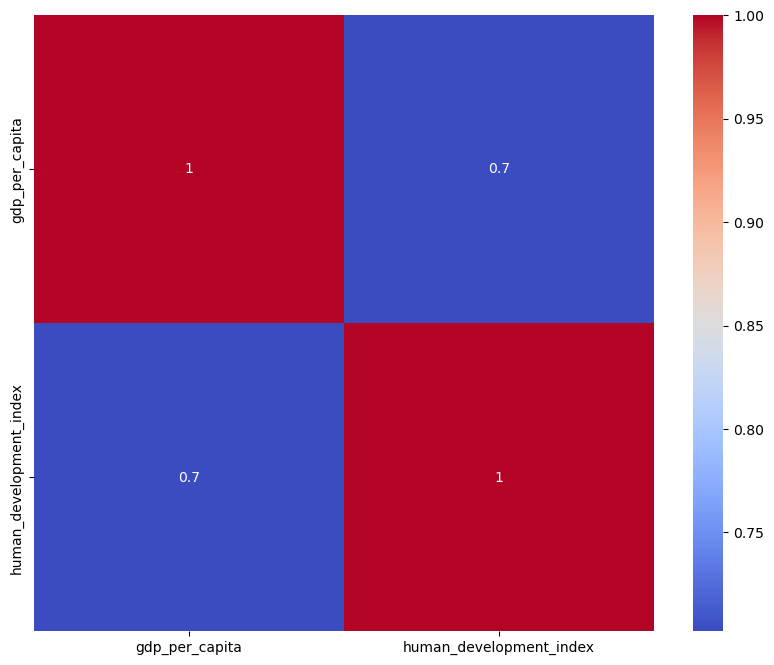

In [31]:
# Calculate correlation matrix
corr = data[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('v-correlation matrix-3.png', dpi=700,bbox_inches='tight')
plt.show()

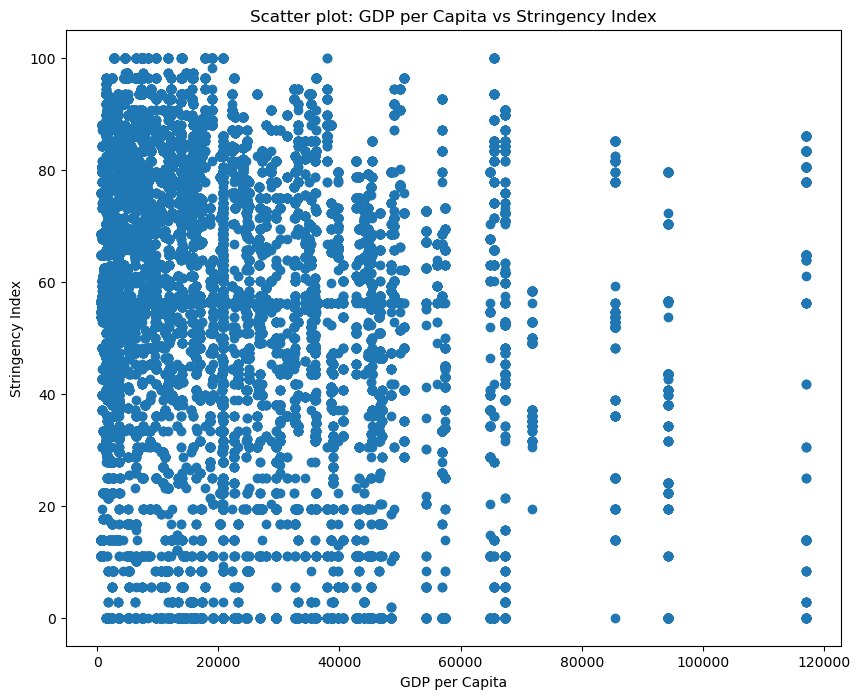

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(data['gdp_per_capita'], data['stringency_index'])
plt.xlabel('GDP per Capita')
plt.ylabel('Stringency Index')
plt.title('Scatter plot: GDP per Capita vs Stringency Index')
plt.savefig('v-ScatterPlot2.png', dpi=700,bbox_inches='tight')
plt.show()

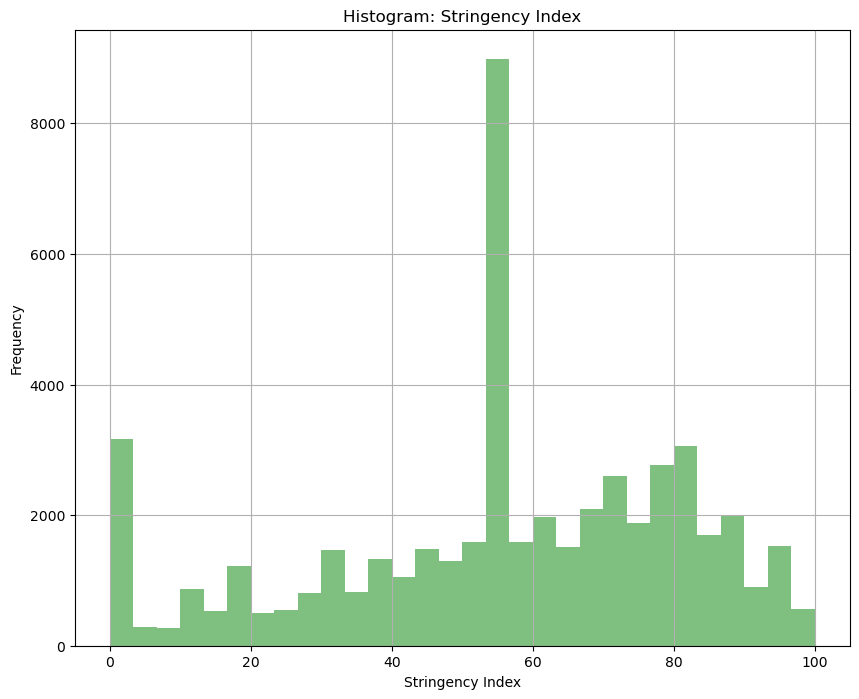

In [33]:
plt.figure(figsize=(10, 8))
plt.hist(data['stringency_index'], bins=30, alpha=0.5, color='g')
plt.xlabel('Stringency Index')
plt.ylabel('Frequency')
plt.title('Histogram: Stringency Index')
plt.grid(True)
plt.savefig('v-StringencyIndex.png', dpi=700,bbox_inches='tight')
plt.show()

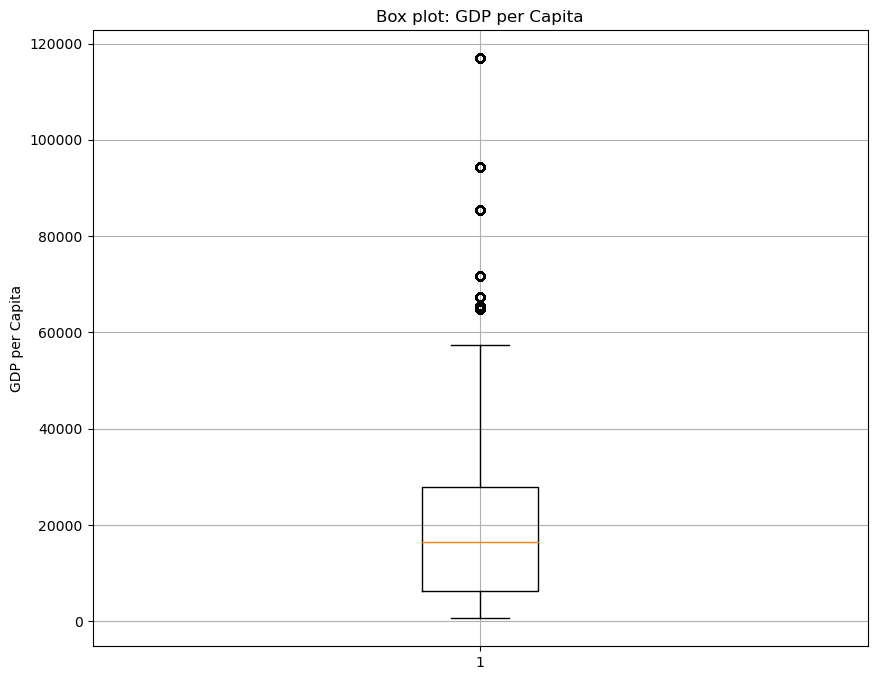

In [34]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['gdp_per_capita'].dropna())
plt.ylabel('GDP per Capita')
plt.title('Box plot: GDP per Capita')
plt.grid(True)
plt.savefig('v-BoxPlots.png', dpi=700,bbox_inches='tight')
plt.show()